In [3]:
# load data anslysis packages
import pandas as pd
import numpy as np
# import visulation tools
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Initial parameters
initial_balance = 100000
annual_returns = [0.10, 0.08, 0.06]  # 10%, 8%, 6%
withdrawal_start_year = 15
annual_withdrawal = 6075
max_years = 50  # simulate up to 50 years
# Dictionary to store results for each return rate
results = {}

In [32]:
# Calculate account balance and withdrawals for each return rate
for return_rate in annual_returns:
    # Initialize arrays to store results
    balances = np.zeros(max_years)
    cumulative_withdrawals = np.zeros(max_years)
    
    # Set initial balance
    balances[0] = initial_balance
    
    # Simulate account growth and withdrawals over time
    for year in range(1, max_years):
        # Apply growth to previous year's balance
        balances[year] = balances[year-1] * (1 + return_rate)
        
        # Apply withdrawal if we've reached the withdrawal start year
        if year >= withdrawal_start_year:
            balances[year] -= annual_withdrawal
            cumulative_withdrawals[year] = cumulative_withdrawals[year-1] + annual_withdrawal
        else:
            cumulative_withdrawals[year] = cumulative_withdrawals[year-1]
        
        # Ensure balance doesn't go negative
        if balances[year] < 0:
            balances[year] = 0
            
    # Store results with a formatted key (e.g., "10%")
    rate_key = f"{int(return_rate*100)}%" if return_rate*100 == int(return_rate*100) else f"{return_rate*100:.1f}%"
    results[rate_key] = (balances, cumulative_withdrawals)

# Display the results dictionary keys to verify
print("Results calculated for:", list(results.keys()))

Results calculated for: ['10%', '8%', '6%']


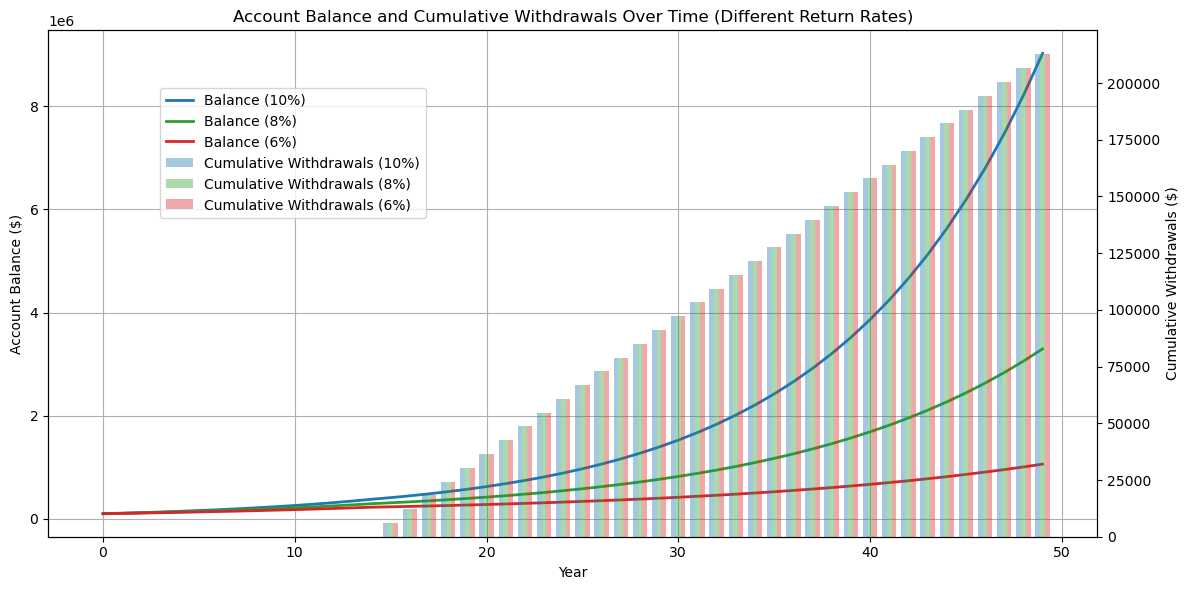

In [33]:
# Re-plot with manually assigned distinct colors for better differentiation
colors = {
    "10%": "tab:blue",
    "8%": "tab:green",
    "6%": "tab:red"
}
bar_alpha = 0.4

years = np.arange(max_years)
fig, ax1 = plt.subplots(figsize=(12, 6))
years = np.arange(max_years)
bar_width = 0.25
offsets = [-bar_width, 0, bar_width]

# Plot balance (line) with distinct colors
for rate in results:
    balances, _ = results[rate]
    ax1.plot(years, balances, label=f'Balance ({rate})', color=colors[rate], linewidth=2)

# Plot cumulative withdrawals (bar) with matching color and transparency
ax2 = ax1.twinx()
for i, rate in enumerate(results):
    _, withdrawals = results[rate]
    ax2.bar(years + offsets[i], withdrawals, width=bar_width, alpha=bar_alpha,
            label=f'Cumulative Withdrawals ({rate})', color=colors[rate])

# Labels and titles
ax1.set_xlabel('Year')
ax1.set_ylabel('Account Balance ($)')
ax2.set_ylabel('Cumulative Withdrawals ($)')
ax1.set_title('Account Balance and Cumulative Withdrawals Over Time (Different Return Rates)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
ax1.grid(True)

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

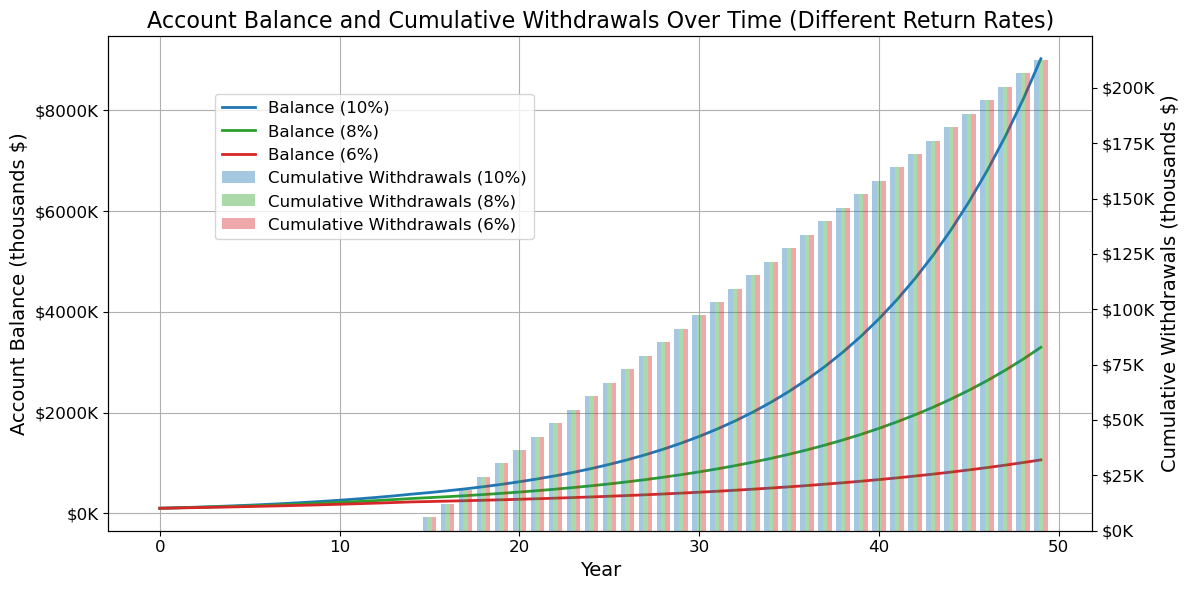

In [35]:
# Create a new figure and axes for plotting
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))
years = np.arange(max_years)
bar_width = 0.25
offsets = [-bar_width, 0, bar_width]

# Plot balance (line) with distinct colors
for rate in results:
    balances, _ = results[rate]
    ax1.plot(years, balances, label=f'Balance ({rate})', color=colors[rate], linewidth=2)

# Plot cumulative withdrawals (bar) with matching color and transparency
ax2 = ax1.twinx()
for i, rate in enumerate(results):
    _, withdrawals = results[rate]
    ax2.bar(years + offsets[i], withdrawals, width=bar_width, alpha=bar_alpha,
            label=f'Cumulative Withdrawals ({rate})', color=colors[rate])

# Convert y-axis to thousands of dollars
def thousands_formatter(x, pos):
    return f'${x/1000:.0f}K'

ax1.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))

# Increase tick size
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Labels and titles
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Account Balance (thousands $)', fontsize=14)
ax2.set_ylabel('Cumulative Withdrawals (thousands $)', fontsize=14)
ax1.set_title('Account Balance and Cumulative Withdrawals Over Time (Different Return Rates)', fontsize=16)

# Create a combined legend for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

ax1.grid(True)
plt.tight_layout()
plt.show()

In [20]:
%pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_11_0_arm64.whl size=264348 sha256=fe8ffd898a9ead68f1848687397bf851efa7b054b822000e6221c32f0ee23a6f
  Stored in directory: /Users/junjiezhang/Library/Caches/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import yfinance as yf

# Download S&P 500 total return data from 1927 onward (using ^GSPC as proxy for index level)
# Note: Total returns including dividends are not directly available from Yahoo Finance;
# We'll download price data and mention the limitation

# Fetch historical data
spy = yf.download('^GSPC', start='1928-01-01', end='2025-01-01', interval='1mo', progress=False)

spy.head()


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1985-01-01,179.630005,180.270004,163.360001,167.199997,2673710000
1985-02-01,181.179993,183.949997,177.750000,179.630005,2194620000
1985-03-01,180.660004,183.889999,176.529999,181.179993,2153090000
1985-04-01,179.830002,183.610001,177.860001,180.660004,1981880000
1985-05-01,189.550003,189.979996,178.350006,179.830002,2350340000


In [24]:
spy.columns

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [27]:
# Access the Close price using the MultiIndex
spy_yearly = spy[('Close', '^GSPC')].resample('Y').last()
spy_yearly_return = spy_yearly.pct_change().dropna()

# Convert to DataFrame with years
returns_df = pd.DataFrame({
    'Year': spy_yearly_return.index.year,
    'S&P 500 Price Return': spy_yearly_return.values
})

# Show the first few years of return data
returns_df.head()

/var/folders/60/j13rv8sj6h7_s2bchmfjrwbm0000gn/T/ipykernel_26957/3491155347.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  spy_yearly = spy[('Close', '^GSPC')].resample('Y').last()


,Year,S&P 500 Price Return
0,1986,0.146204
1,1987,0.020275
2,1988,0.124008
3,1989,0.272505
4,1990,-0.065591


In [38]:
returns_df['S&P 500 Price Return'].mean(), returns_df['S&P 500 Price Return'].median(), returns_df['S&P 500 Price Return'].std(), returns_df['S&P 500 Price Return'].var(), returns_df['S&P 500 Price Return'].skew(), returns_df['S&P 500 Price Return'].kurt()



(0.10278028915029466,
 0.12782713853760175,
 0.16583184666963852,
 0.027500201369862497,
 -0.8995592709968905,
 0.6806298104983086)

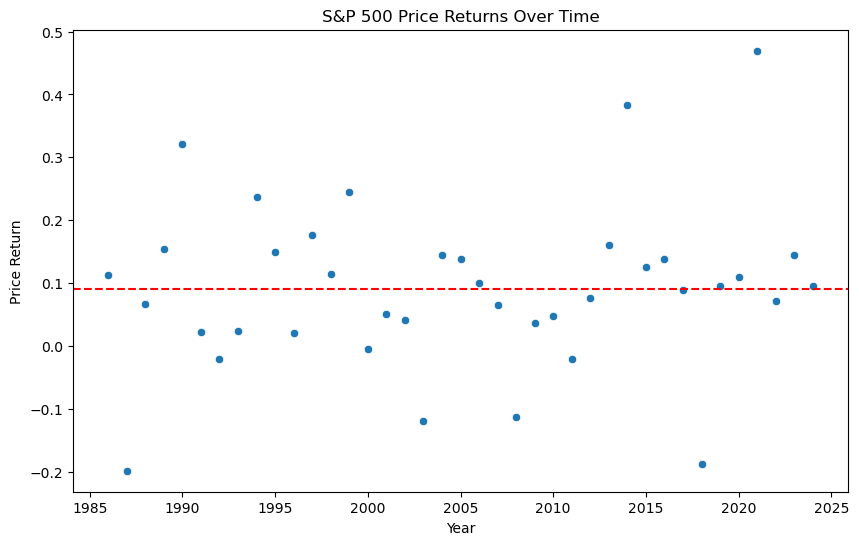

In [53]:
# plot the histogram of the S&P 500 price returns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='S&P 500 Price Return', data=returns_df)
# add a line of the mean price return
plt.axhline(returns_df['S&P 500 Price Return'].mean(), color='red', linestyle='--')
plt.title('S&P 500 Price Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Price Return')
plt.show()

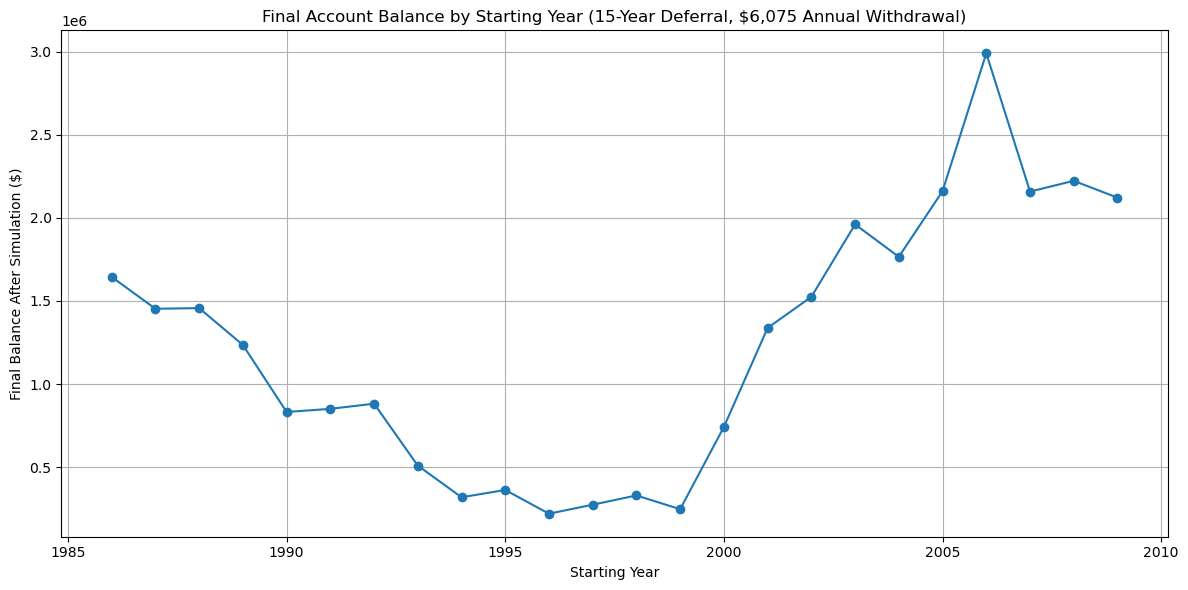

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate using a mock version of returns_df since we can't pull actual data
# Assume returns_df contains data from 1986 to 2024
years = list(range(1986, 2025))
np.random.seed(42)
mock_returns = np.random.normal(loc=0.10, scale=0.15, size=len(years))  # simulate price returns
returns_df = pd.DataFrame({
    'Year': years,
    'S&P 500 Price Return': mock_returns
})

# Parameters
initial_deposit = 100000
withdrawal_start_offset = 15  # years
annual_withdrawal = 6075
future_return = 0.10
max_projection_years = 50

# Store results
final_balances = []
start_years = []

for start_index in range(len(returns_df) - withdrawal_start_offset):
    start_year = returns_df['Year'].iloc[start_index]
    simulated_returns = returns_df['S&P 500 Price Return'].iloc[start_index:start_index + max_projection_years].tolist()

    # Extend with 10% future return beyond 2024
    if len(simulated_returns) < max_projection_years:
        simulated_returns += [future_return] * (max_projection_years - len(simulated_returns))

    balance = initial_deposit
    for i, r in enumerate(simulated_returns):
        if i >= withdrawal_start_offset:
            withdrawal = min(annual_withdrawal, balance)
            balance -= withdrawal
        balance *= (1 + r)
        if balance <= 0:
            balance = 0
            break

    final_balances.append(balance)
    start_years.append(start_year)

# Plot final balances
plt.figure(figsize=(12, 6))
plt.plot(start_years, final_balances, marker='o')
plt.title('Final Account Balance by Starting Year (15-Year Deferral, $6,075 Annual Withdrawal)')
plt.xlabel('Starting Year')
plt.ylabel('Final Balance After Simulation ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


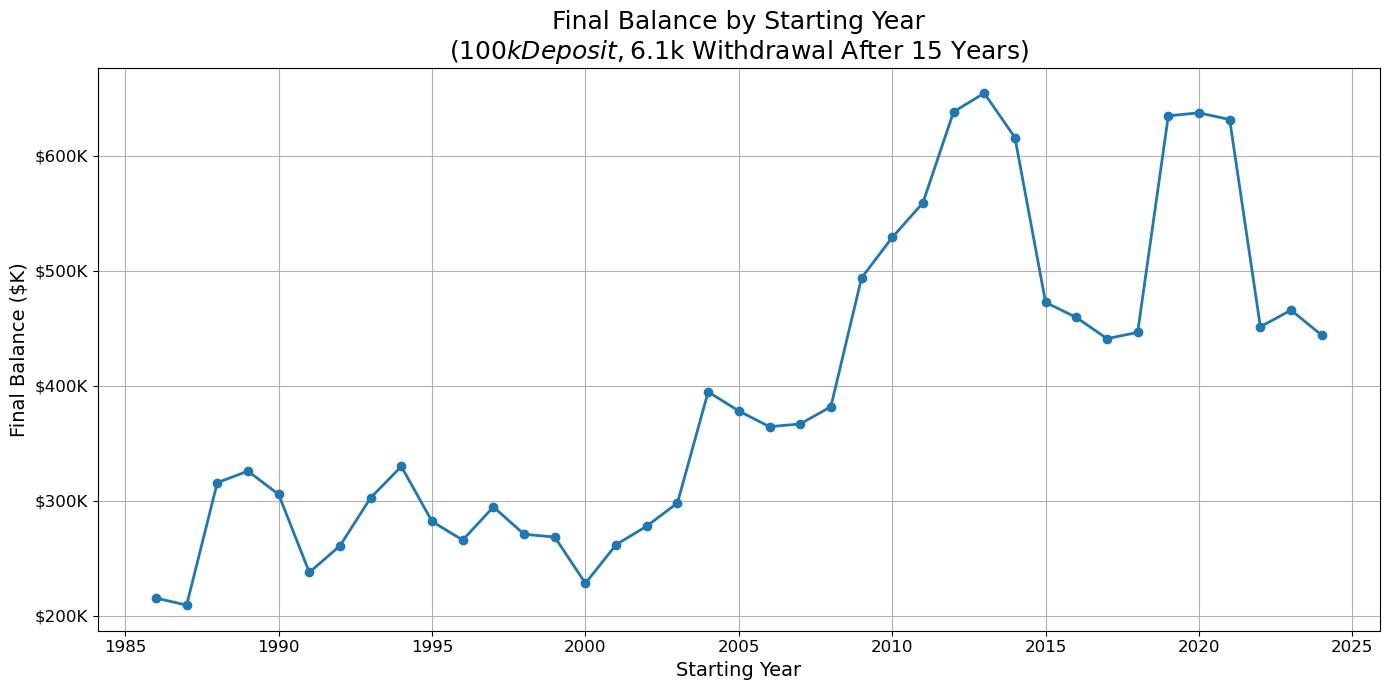

In [43]:
# Set simulation years
years = list(range(1986, 2025))
mock_returns = np.random.normal(loc=0.10, scale=0.15, size=len(years))  # simulate returns
returns_df = pd.DataFrame({
    'Year': years,
    'S&P 500 Price Return': mock_returns
})

# Updated parameters
final_balances = []
start_years = []
initial_deposit = 100000
withdrawal_start_offset = 15
annual_withdrawal = 6075
future_return = 0.10
max_projection_years = 90  # to simulate up to 2075 for the 1986 start

for start_index in range(len(returns_df)):
    start_year = returns_df['Year'].iloc[start_index]
    simulated_returns = returns_df['S&P 500 Price Return'].iloc[start_index:].tolist()

    # Extend with 10% returns to make the full horizon 90 years
    if len(simulated_returns) < max_projection_years:
        simulated_returns += [future_return] * (max_projection_years - len(simulated_returns))

    balance = initial_deposit
    for i, r in enumerate(simulated_returns[:max_projection_years]):
        if i >= withdrawal_start_offset:
            withdrawal = min(annual_withdrawal, balance)
            balance -= withdrawal
        balance *= (1 + r)
        if balance <= 0:
            balance = 0
            break

    final_balances.append(balance / 1000)  # convert to $k
    start_years.append(start_year)

# Convert final_balances to thousands of dollars
final_balances_k = [balance / 1000 for balance in final_balances]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(start_years, final_balances_k, marker='o', linewidth=2)
plt.title('Final Balance by Starting Year\n($100k Deposit, $6.1k Withdrawal After 15 Years)', fontsize=18)
plt.xlabel('Starting Year', fontsize=14)
plt.ylabel('Final Balance ($K)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format y-axis to show thousands with K suffix
def thousands_formatter(x, pos):
    return f'${x:.0f}K'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))

plt.grid(True)
plt.tight_layout()
plt.show()


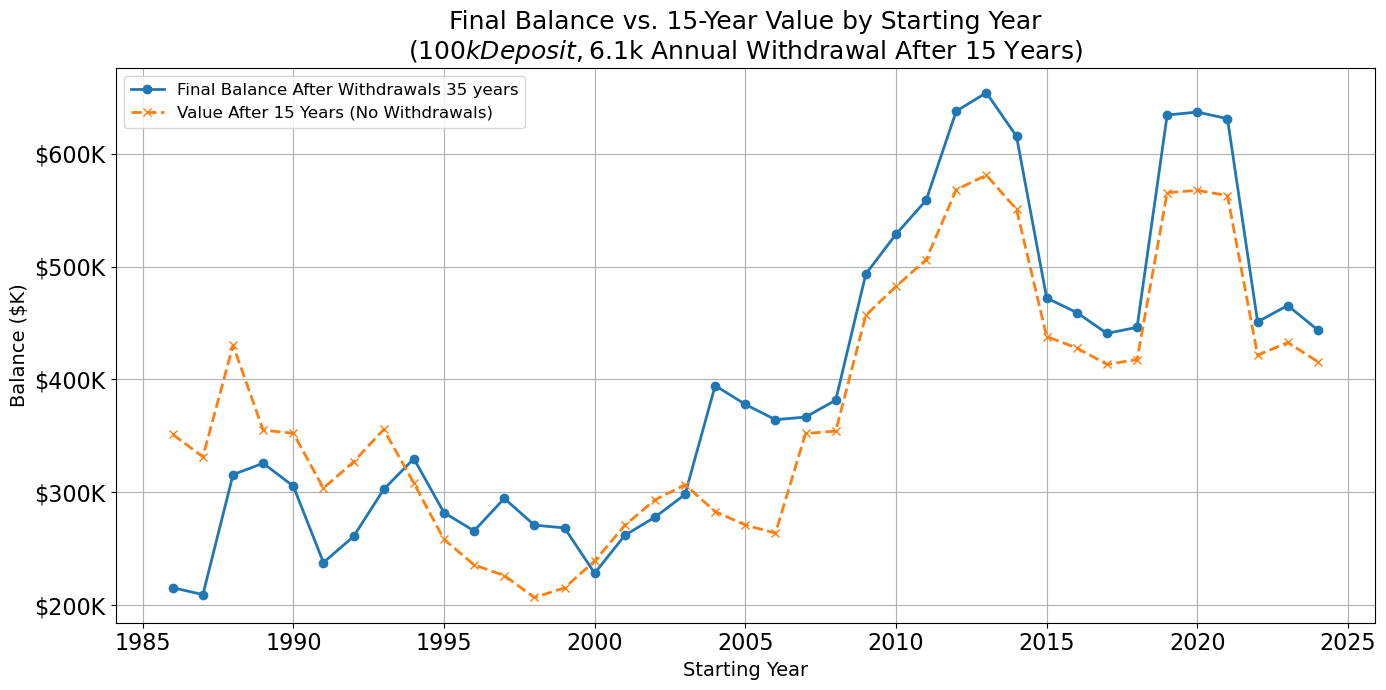

In [47]:
# Store values after 15 years without withdrawals for comparison
value_after_15_years = []

for start_index in range(len(returns_df)):
    start_year = returns_df['Year'].iloc[start_index]
    simulated_returns = returns_df['S&P 500 Price Return'].iloc[start_index:].tolist()

    # Extend with 10% returns to ensure full 15-year growth window
    if len(simulated_returns) < withdrawal_start_offset:
        simulated_returns += [future_return] * (withdrawal_start_offset - len(simulated_returns))

    balance = initial_deposit
    for r in simulated_returns[:withdrawal_start_offset]:
        balance *= (1 + r)

    value_after_15_years.append(balance / 1000)  # convert to $k

# Convert final_balances to thousands of dollars if not already done
final_balances_k = [balance / 1000 if balance > 1000 else balance for balance in final_balances]

# Plotting both lines
plt.figure(figsize=(14, 7))
plt.plot(start_years, final_balances_k, marker='o', linewidth=2, label='Final Balance After Withdrawals 35 years')
plt.plot(start_years, value_after_15_years, marker='x', linestyle='--', linewidth=2, label='Value After 15 Years (No Withdrawals)')

plt.title('Final Balance vs. 15-Year Value by Starting Year\n($100k Deposit, $6.1k Annual Withdrawal After 15 Years)', fontsize=18)
plt.xlabel('Starting Year', fontsize=14)
plt.ylabel('Balance ($K)', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Format y-axis to show thousands with K suffix
def thousands_formatter(x, pos):
    return f'${x:.0f}K'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(thousands_formatter))

plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()